### Stock price Prediction using LSTM

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


In [6]:
df =  pd.read_csv("D:/Acedemics/Sjc/Internships/Bharat Intern/Task1/prices.csv", header=0)
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [7]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

### Data processing

In [8]:
data = df[['open', 'high', 'low', 'close', 'volume']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [9]:
seq_length = 10 
n_features = 5 

In [10]:
X, y = [], []
for i in range(len(data) - seq_length):
    X.append(data[i:i + seq_length])
    y.append(data[i + seq_length][3])  # Predicting the 'close' price

X = np.array(X)
y = np.array(y)

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)


### LSTM MODEL

In [12]:
model = Sequential()
model.add(LSTM(10, input_shape=(seq_length, n_features), return_sequences=True))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
21282/21282 [==============================] - 247s 11ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 2/10
21282/21282 [==============================] - 249s 12ms/step - loss: 0.0018 - val_loss: 0.0032
Epoch 3/10
21282/21282 [==============================] - 256s 12ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 4/10
21282/21282 [==============================] - 271s 13ms/step - loss: 9.4885e-04 - val_loss: 0.0025
Epoch 5/10
21282/21282 [==============================] - 256s 12ms/step - loss: 7.9270e-04 - val_loss: 0.0023
Epoch 6/10
21282/21282 [==============================] - 263s 12ms/step - loss: 6.8738e-04 - val_loss: 0.0020
Epoch 7/10
21282/21282 [==============================] - 240s 11ms/step - loss: 6.2598e-04 - val_loss: 0.0019
Epoch 8/10
21282/21282 [==============================] - 244s 11ms/step - loss: 5.7647e-04 - val_loss: 0.0017
Epoch 9/10
21282/21282 [==============================] - 241s 11ms/step - loss: 5.4053e-04 - val_loss: 0.0017
Epoch 10/10
2

In [15]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

2661/2661 [==============================] - 11s 4ms/step - loss: 0.0025
Test Loss: 0.002549404976889491


In [16]:
# Make predictions
predicted = model.predict(X_test)

2661/2661 [==============================] - 13s 5ms/step


In [17]:
predicted = scaler.inverse_transform(np.hstack([X_test[:, -1, :4], predicted]))

In [20]:

actual = scaler.inverse_transform(np.hstack([X_test[:, -1, :4], y_test.reshape(-1, 1)]))
                                            

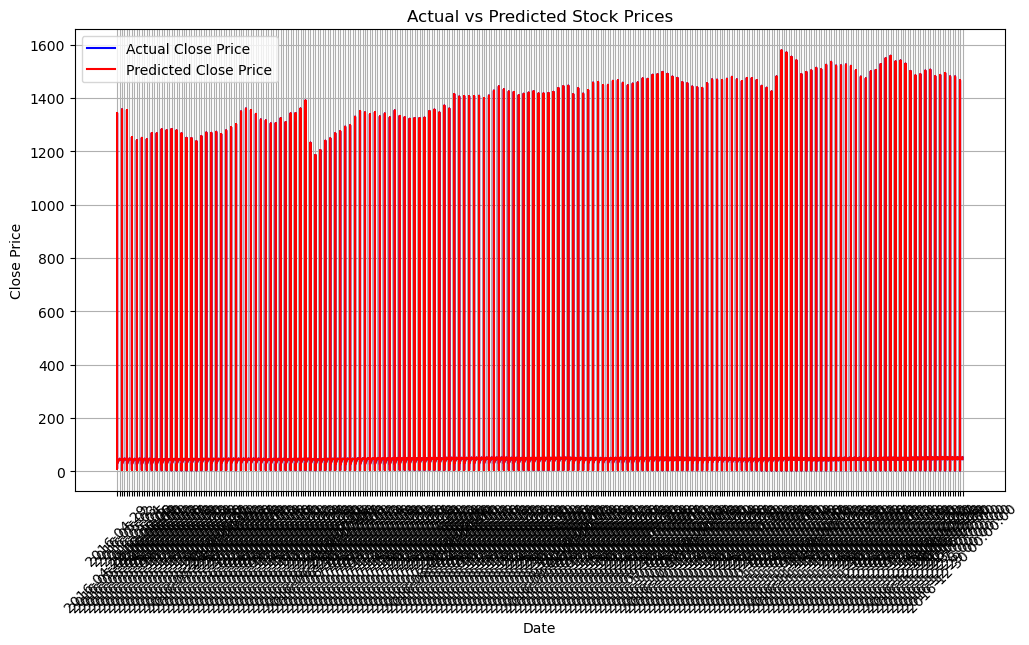

In [21]:
import matplotlib.pyplot as plt

# Extract the dates for the test set
dates = df['date'].iloc[-len(y_test):].values

# Plot the actual and predicted 'close' prices
plt.figure(figsize=(12, 6))
plt.plot(dates, actual[:, 3], label='Actual Close Price', color='b')
plt.plot(dates, predicted[:, 3], label='Predicted Close Price', color='r')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
